In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [114]:
datast = pd.read_csv('student.csv')
datast

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [115]:
datast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [116]:
datast.fillna(0, inplace=True)

G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


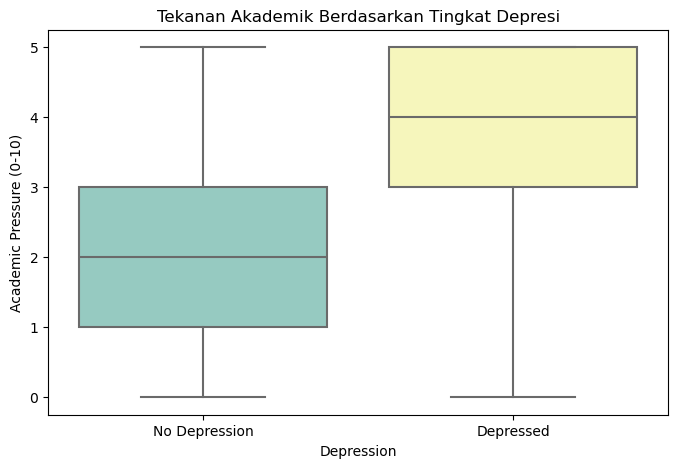

In [117]:
# Visualisasi 2: Hubungan antara Tekanan Akademik dan Depresi
plt.figure(figsize=(8, 5))
sns.boxplot(x="Depression", y="Academic Pressure", data=datast, palette="Set3")
plt.title("Tekanan Akademik Berdasarkan Tingkat Depresi")
plt.xlabel("Depression")
plt.ylabel("Academic Pressure (0-10)")
plt.xticks([0, 1], ["No Depression", "Depressed"])
plt.show()

G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


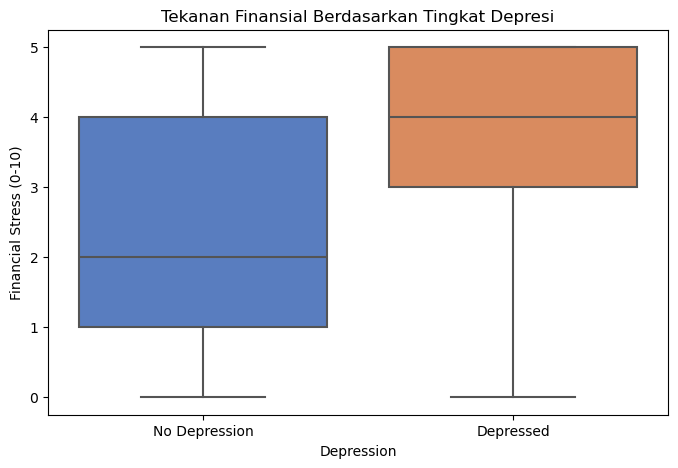

In [118]:
# Visualisasi 5: Korelasi Tekanan Finansial dengan Tingkat Depresi
plt.figure(figsize=(8, 5))
sns.boxplot(x="Depression", y="Financial Stress", data=datast, palette="muted")
plt.title("Tekanan Finansial Berdasarkan Tingkat Depresi")
plt.xlabel("Depression")
plt.ylabel("Financial Stress (0-10)")
plt.xticks([0, 1], ["No Depression", "Depressed"])
plt.show()

G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


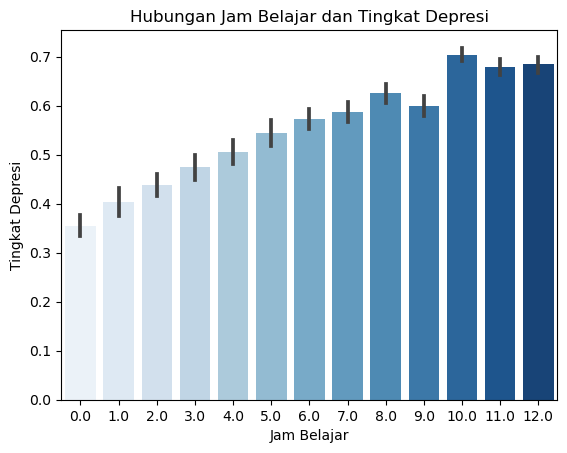

In [119]:
# Membuat bar plot
sns.barplot(x='Work/Study Hours', y='Depression', data=datast, palette='Blues')

# Memberikan judul dan label
plt.title('Hubungan Jam Belajar dan Tingkat Depresi')
plt.xlabel('Jam Belajar')
plt.ylabel('Tingkat Depresi')

# Menampilkan plot
plt.show()

In [120]:
datast['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [121]:
datast['Family History of Mental Illness'] = datast['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
datast['Have you ever had suicidal thoughts ?'] = datast['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
def extract_hours(text):
    if "Less than" in text:
        # Mengambil angka setelah kata "Less than"
        return int(text.split(' ')[2])
    elif '-' in text:
        # Jika dalam format "7-8 hours", ambil rata-rata
        return (int(text.split('-')[0]) + int(text.split('-')[1].split()[0])) / 2
    else:
        # Jika format tidak sesuai, return None atau nilai default
        return 3.0
datast['Sleep Duration'] = datast['Sleep Duration'].apply(extract_hours)
datast['Gender'] = datast['Gender'].map({'Male': 1, 'Female': 0})
datast['Dietary Habits'] = datast['Dietary Habits'].map({'Healthy': 3, 'Moderate': 2,'Unhealthy' : 1,'Others' : 0})
datast

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5.5,3,B.Pharm,1,3.0,1.0,0,1
1,8,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5.5,2,BSc,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,5.0,3,BA,0,9.0,1.0,1,0
3,30,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7.5,2,BCA,1,4.0,5.0,1,1
4,32,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5.5,2,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5.5,1,Class 12,1,7.0,1.0,1,0
27897,140686,1,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,5.0,3,MSc,0,0.0,3.0,1,0
27898,140689,1,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5.5,1,MD,0,12.0,2.0,0,0
27899,140690,0,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,5.0,3,Class 12,1,10.0,5.0,0,1


In [122]:
# Memisahkan fitur (X) dan target (y)
X = datast.drop(columns=['id','Degree','Profession','City','Depression'])
print(X.info())
Y = datast['Depression']
print(Y.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   Work Pressure                          27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Job Satisfaction                       27901 non-null  float64
 7   Sleep Duration                         27901 non-null  float64
 8   Dietary Habits                         27901 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [123]:
# Membagi data menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Membuat model Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

rf_model

G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

RandomForestClassifier(random_state=42)

In [125]:
# Melakukan prediksi pada data test
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8292420713133847
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

In [127]:
student_data = {
    'Gender': 0,
    'Age': 24,
    'Academic Pressure': 2,
    'Work Pressure': 0,
    'CGPA' : 5.9,
    'Study Satisfaction': 2,
    'Job Satisfaction': 0,
    'Sleep Duration': 5,
    'Dietary Habits': 2,
    'Have you ever had suicidal thoughts ?': 0,
    'Work/Study Hours': 3,
    'Financial Stress'  :2,
    'Family History of Mental Illness' : 1,
}

# Konversi data rumah baru menjadi array 2D sesuai input yang diharapkan model
new_student = np.array([list(student_data.values())]).reshape(1, -1)

# Melakukan prediksi harga
predicted_sysmpthon = rf_model.predict(new_student)

print(f"Predicted Depression : ",predicted_sysmpthon[0])

Predicted Depression :  0


G:\ANACONDA\envs\PraktikumFuzzy\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
